### Прямоугольные антенны, диаметр 0.08 мм

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel('data/coil_stat.xlsx')
rows = sorted([f'V{n}{d:02d}' for d in range(2, 11) for n in range(1, 12)])
rects = df.loc[(df['file'].isin(rows))]

%matplotlib inline


In [2]:
def plot_step_stat(dframe, step, wire, ax=None, color=''):
    res = dframe.loc[(dframe['step (mm)'] == step) & (dframe['wire_dia (mm)'] == wire)][['file', 'wire_len (cm)', 'coil_n', 'L, uH']]
    res = res.sort_values(['coil_n'], ascending=[1])
    ax = res.plot(x='coil_n', y='L, uH', title=f'проводник={wire} мм, шаг={step} мм', ax=ax, color=color, label=f'{step} мм')
    ax1 = ax.twiny()
    res.plot(x='wire_len (cm)', y='L, uH', ax=ax1, color=color)
    ax.grid(linestyle='--')
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 25)
    ax1.set_xlim(0, 295)
    ax1.set_ylim(0, 25)
    ax1.set_xlabel('Длина проводника, см')
    ax1.lines = list()
    ax1.get_legend().remove()
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Кол-во витков')
    return ax, res

In [3]:
def plot_coil_n_stat(dframe, coil_n, wire, ax=None, color=''):
    res = dframe.loc[(dframe['coil_n'] == coil_n) & (dframe['wire_dia (mm)'] == wire)][['file', 'step (mm)', 'L, uH']]
    res = res.sort_values(['step (mm)'], ascending=[1])
    ax = res.plot(x='step (mm)', y='L, uH', title=f'проводник={wire} мм, кол-во витков={coil_n}', ax=ax, color=color, label=f'{coil_n} шт')
    ax.grid(linestyle='--')
    ax.set_xlim(0, 1.1)
    ax.set_ylim(0, 25)
    ax.set_ylabel('Индуктивность, мкГн')
    ax.set_xlabel('Шаг, мм')
    return ax, res

,file,wire_len (cm),coil_n,"L, uH"
10,V102,52.796,2.0,1.485
44,V202,76.766,3.0,2.656
52,V302,100.611,4.0,4.029
64,V402,124.296,5.0,5.899
85,V502,147.821,6.0,8.085
93,V602,172.347,7.0,10.385
101,V702,197.043,8.0,13.034
109,V802,221.901,9.0,16.017
117,V902,246.867,10.0,19.566
2,V1002,272.016,11.0,23.140


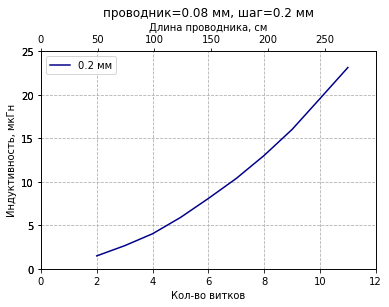

In [4]:
_, res = plot_step_stat(rects, step=0.2, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
12,V103,52.736,2.0,1.453
46,V203,76.546,3.0,2.561
54,V303,100.207,4.0,3.887
66,V403,123.598,5.0,5.551
87,V503,146.814,6.0,7.475
95,V603,171.342,7.0,9.669
103,V703,196.207,8.0,12.177
111,V803,221.270,9.0,14.964
119,V903,246.575,10.0,17.990
4,V1003,272.215,11.0,21.160


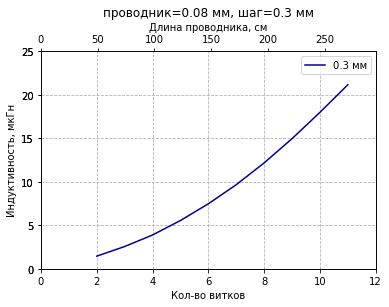

In [5]:
_, res = plot_step_stat(rects, step=0.3, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
14,V104,52.676,2.0,1.358
48,V204,76.413,3.0,2.232
56,V304,99.858,4.0,3.318
72,V404,122.903,5.0,5.223
89,V504,145.725,6.0,6.762
97,V604,170.757,7.0,8.975
105,V704,195.444,8.0,11.347
113,V804,220.527,9.0,13.850
121,V904,246.117,10.0,16.741
6,V1004,272.072,11.0,19.712


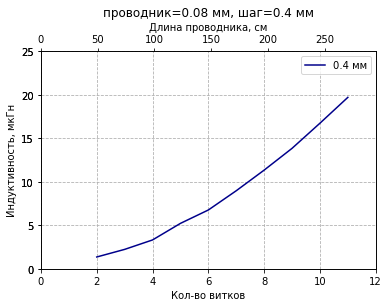

In [6]:
_, res = plot_step_stat(rects, step=0.4, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"
16,V105,52.616,2.0,1.382
50,V205,76.194,3.0,2.263
58,V305,99.494,4.0,3.437
75,V405,122.217,5.0,5.118
91,V505,144.645,6.0,6.408
99,V605,169.258,7.0,8.561
107,V705,194.393,8.0,10.710
115,V805,219.948,9.0,13.064
123,V905,245.877,10.0,15.742
8,V1005,272.229,11.0,18.786


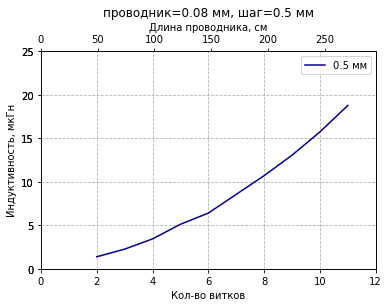

In [7]:
_, res = plot_step_stat(rects, step=0.5, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"


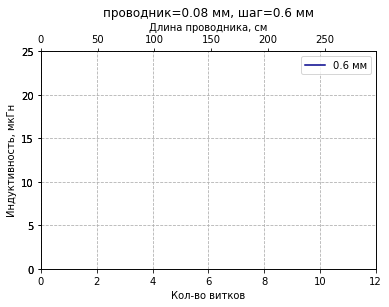

In [8]:
_, res = plot_step_stat(rects, step=0.6, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"


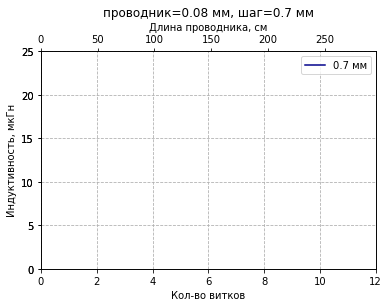

In [9]:
_, res = plot_step_stat(rects, step=0.7, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"


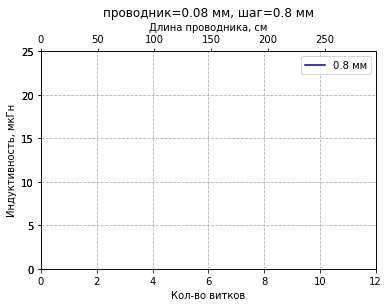

In [10]:
_, res = plot_step_stat(rects, step=0.8, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"


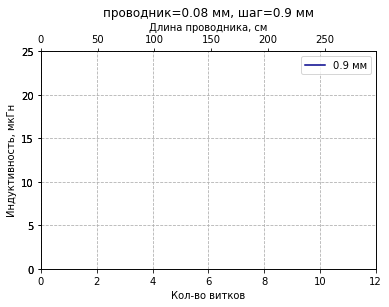

In [11]:
_, res = plot_step_stat(rects, step=0.9, wire=0.08, color='darkblue')
res

,file,wire_len (cm),coil_n,"L, uH"


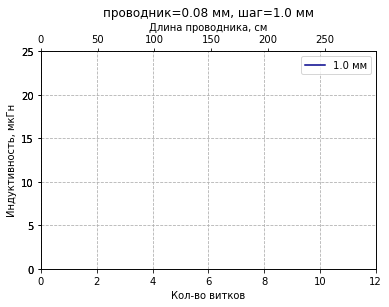

In [12]:
_, res = plot_step_stat(rects, step=1.0, wire=0.08, color='darkblue')
res

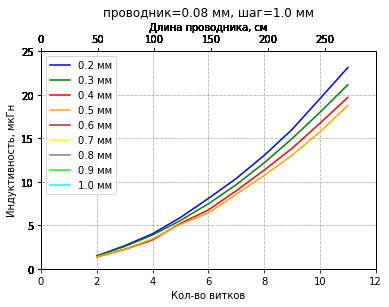

In [13]:
ax, _ = plot_step_stat(rects, step=0.2, wire=0.08, color='blue')
for st, col in zip([0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0], ['green', 'red', 'orange', 'brown', 'yellow', 'grey', 'lime', 'cyan']):
    plot_step_stat(rects, step=st, wire=0.08, color=col, ax=ax)

,file,step (mm),"L, uH"
10,V102,0.2,1.485
12,V103,0.3,1.453
14,V104,0.4,1.358
16,V105,0.5,1.382


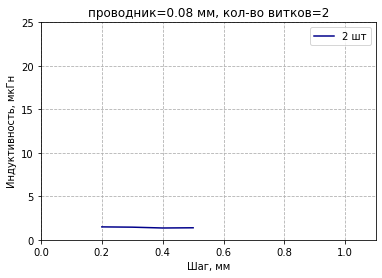

In [14]:
_, res = plot_coil_n_stat(rects, coil_n=2, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
44,V202,0.2,2.656
46,V203,0.3,2.561
48,V204,0.4,2.232
50,V205,0.5,2.263


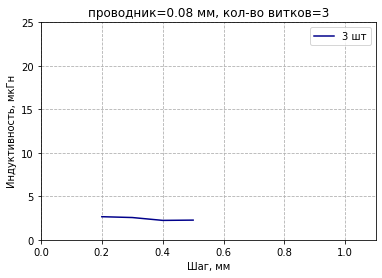

In [15]:
_, res = plot_coil_n_stat(rects, coil_n=3, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
52,V302,0.2,4.029
54,V303,0.3,3.887
56,V304,0.4,3.318
58,V305,0.5,3.437


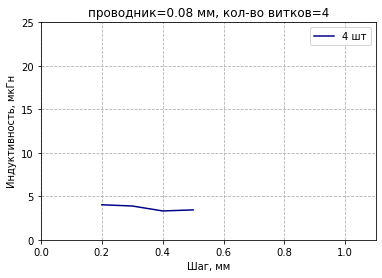

In [16]:
_, res = plot_coil_n_stat(rects, coil_n=4, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
64,V402,0.2,5.899
66,V403,0.3,5.551
72,V404,0.4,5.223
75,V405,0.5,5.118


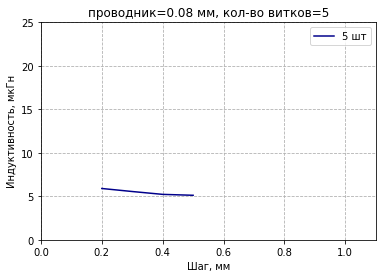

In [17]:
_, res = plot_coil_n_stat(rects, coil_n=5, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
85,V502,0.2,8.085
87,V503,0.3,7.475
89,V504,0.4,6.762
91,V505,0.5,6.408


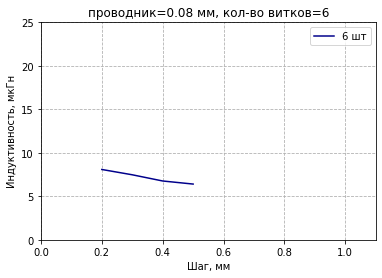

In [18]:
_, res = plot_coil_n_stat(rects, coil_n=6, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
93,V602,0.2,10.385
95,V603,0.3,9.669
97,V604,0.4,8.975
99,V605,0.5,8.561


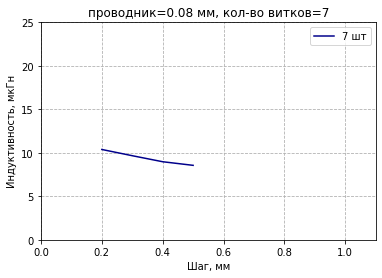

In [19]:
_, res = plot_coil_n_stat(rects, coil_n=7, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
101,V702,0.2,13.034
103,V703,0.3,12.177
105,V704,0.4,11.347
107,V705,0.5,10.710


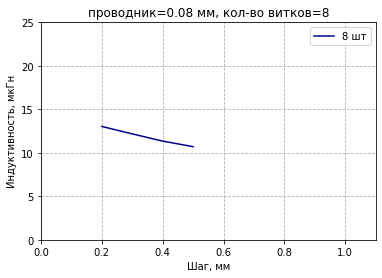

In [20]:
_, res = plot_coil_n_stat(rects, coil_n=8, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
109,V802,0.2,16.017
111,V803,0.3,14.964
113,V804,0.4,13.850
115,V805,0.5,13.064


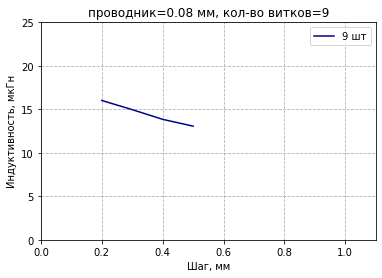

In [21]:
_, res = plot_coil_n_stat(rects, coil_n=9, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
117,V902,0.2,19.566
119,V903,0.3,17.990
121,V904,0.4,16.741
123,V905,0.5,15.742


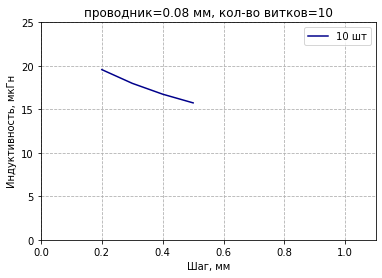

In [22]:
_, res = plot_coil_n_stat(rects, coil_n=10, wire=0.08, color='darkblue')
res

,file,step (mm),"L, uH"
2,V1002,0.2,23.140
4,V1003,0.3,21.160
6,V1004,0.4,19.712
8,V1005,0.5,18.786


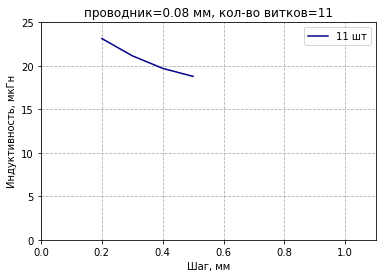

In [23]:
_, res = plot_coil_n_stat(rects, coil_n=11, wire=0.08, color='darkblue')
res

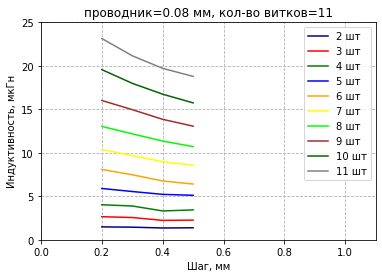

In [24]:
ax, res = plot_coil_n_stat(rects, coil_n=2, wire=0.08, color='darkblue')
for st, col in zip(range(3, 12), ['red', 'green', 'blue', 'orange', 'yellow', 'lime', 'brown', 'darkgreen', 'grey']):
    plot_coil_n_stat(rects, coil_n=st, wire=0.08, ax=ax, color=col)